<h1>Importing Libraries</h1>

In [1]:
import sys
!{sys.executable} -m pip install -q pandas pyarrow numpy scipy seaborn matplotlib scikit-learn six pydotplus wordcloud plotly
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip


<h1>Loading Dataset</h1>

In [3]:
data_file = 'PS7_Covid_Omicron.csv'
df_omicron = pd.read_csv(data_file)

<h1>Exploratory Data Analysis & Visualize to study</h1>

<h3>Going through the data</h3>

In [9]:
df_omicron.head()

location        date    variant  num_sequences  perc_sequences  \
0   Angola  2020-07-06      Alpha              0             0.0   
1   Angola  2020-07-06  B.1.1.277              0             0.0   
2   Angola  2020-07-06  B.1.1.302              0             0.0   
3   Angola  2020-07-06  B.1.1.519              0             0.0   
4   Angola  2020-07-06    B.1.160              0             0.0   

   num_sequences_total  
0                    3  
1                    3  
2                    3  
3                    3  
4                    3

In [10]:
df_omicron.columns

Index(['location', 'date', 'variant', 'num_sequences', 'perc_sequences',
       'num_sequences_total'],
      dtype='object')

In [11]:
df_omicron.describe()

num_sequences  perc_sequences  num_sequences_total
count  100416.000000   100416.000000        100416.000000
mean       72.171676        6.154355          1509.582457
std      1669.262169       21.898989          8445.291772
min         0.000000       -0.010000             1.000000
25%         0.000000        0.000000            12.000000
50%         0.000000        0.000000            59.000000
75%         0.000000        0.000000           394.000000
max    142280.000000      100.000000        146170.000000

<h3>Information about columns</h3>
<ul>
    <li>location: this is the country for which the variants information is provided</li>
    <li>date: date for the data entry</li>
    <li>variant: this is the variant corresponding to this data entry</li>
    <li>num_sequences: the number of sequences processed (for the country, variant and date)</li>
    <li>perc_sequences: percentage of sequences from the total number of sequences (for the country, variant and date)</li>
    <li>num_sequences_total: total number of sequences (for the country, variant and date)</li>
</ul>

In [13]:
df_omicron.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100416 entries, 0 to 100415
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   location             100416 non-null  object 
 1   date                 100416 non-null  object 
 2   variant              100416 non-null  object 
 3   num_sequences        100416 non-null  int64  
 4   perc_sequences       100416 non-null  float64
 5   num_sequences_total  100416 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 4.6+ MB


In [14]:
df_omicron.shape

(100416, 6)

<p>No missing values</p>

In [15]:
df_omicron.isnull().sum()

location               0
date                   0
variant                0
num_sequences          0
perc_sequences         0
num_sequences_total    0
dtype: int64

<h2>Pre-Processing</h2>

<p>Convert date (object) to date time format</p>

In [17]:
df_omicron.date = pd.to_datetime(df_omicron.date)
print('Date starts at ',df_omicron.date.min(), 'ends at ',df_omicron.date.max())

Date starts at  2020-05-11 00:00:00 ends at  2022-01-05 00:00:00


<p>Unique Countries</p>

In [18]:
print('No of countries in the data ',len(df_omicron.location.unique()))

No of countries in the data  121


<p>Covid Variants:</p>

In [19]:
df_omicron.variant.value_counts()

variant
Alpha             4184
B.1.1.277         4184
others            4184
S:677P.Pelican    4184
S:677H.Robin1     4184
Omicron           4184
Mu                4184
Lambda            4184
Kappa             4184
Iota              4184
Gamma             4184
Eta               4184
Epsilon           4184
Delta             4184
Beta              4184
B.1.620           4184
B.1.367           4184
B.1.258           4184
B.1.221           4184
B.1.177           4184
B.1.160           4184
B.1.1.519         4184
B.1.1.302         4184
non_who           4184
Name: count, dtype: int64

<p>Unique Values of Variants</p>

In [21]:
df_omicron.variant.unique()

array(['Alpha', 'B.1.1.277', 'B.1.1.302', 'B.1.1.519', 'B.1.160',
       'B.1.177', 'B.1.221', 'B.1.258', 'B.1.367', 'B.1.620', 'Beta',
       'Delta', 'Epsilon', 'Eta', 'Gamma', 'Iota', 'Kappa', 'Lambda',
       'Mu', 'Omicron', 'S:677H.Robin1', 'S:677P.Pelican', 'others',
       'non_who'], dtype=object)

Unique Values of Sequences

In [22]:
df_omicron.num_sequences.unique()

array([    0,     3,     1, ..., 24395, 24681,   862])

<h2>Visualizations</h2>

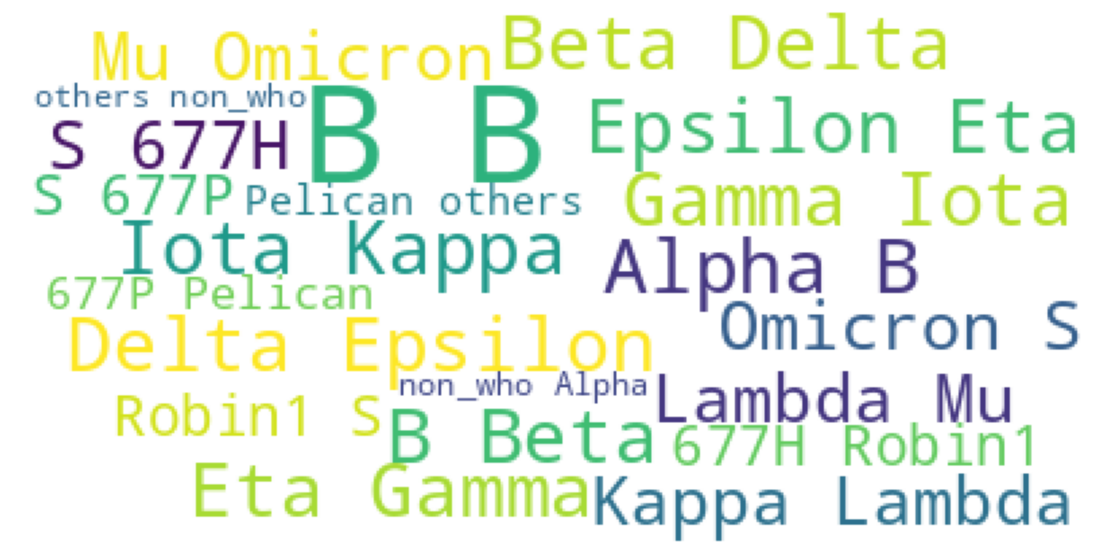

In [30]:
wordCloud = WordCloud(
    background_color='white',
    max_font_size = 50).generate(' '.join(df_omicron.variant))

plt.figure(figsize=(15,7))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()

<h4>Daily cases of different variants</h4>

In [36]:
date_wise_df_omicron = df_omicron.groupby(['date', 'variant'])['num_sequences'].sum().reset_index()
fig = px.bar(date_wise_df_omicron, x = 'date', y = 'num_sequences', color = 'variant')
fig.update_layout(
    title={
            'text' : "Daily cases of different variants",
        },
    xaxis_title="Date",
    yaxis_title="Daily cases"
)
fig.show()

/usr/local/Cellar/jupyterlab/4.0.12/libexec/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



<h4>Create Country DF</h4>

In [37]:
country_dict = {}
for val in df_omicron.location.unique() : 
    if val not in country_dict.keys() : 
        dummy_df = df_omicron[df_omicron.location == val]
        country_dict[val] = dummy_df.num_sequences.sum()

country_df = pd.DataFrame.from_dict(country_dict, orient='index', columns=['total_cases'])
country_df.reset_index(inplace = True)
country_df.sort_values('total_cases', inplace = True)
country_df.head()

index  total_cases
71    Monaco           88
70   Moldova          165
72  Mongolia          171
47      Iraq          222
13    Brunei          335

<p>Country wise total cases</p>

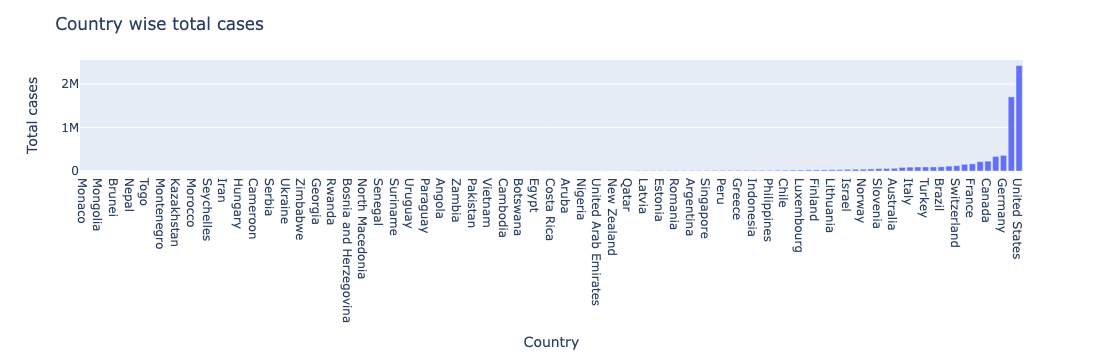

In [38]:
fig = px.bar(country_df, y = 'total_cases', x = 'index')
fig.update_layout(
    title={
            'text' : "Country wise total cases",
        },
    xaxis_title="Country",
    yaxis_title="Total cases"
)
fig.show()

<p>Omicron and Delta variant graph</p>

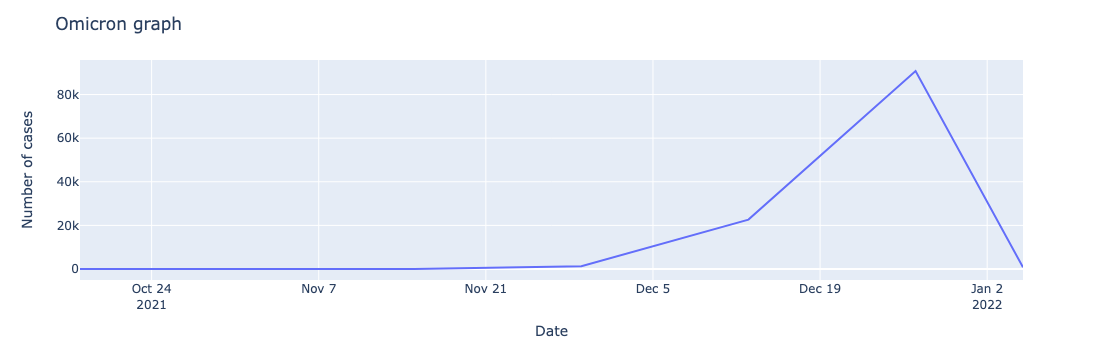

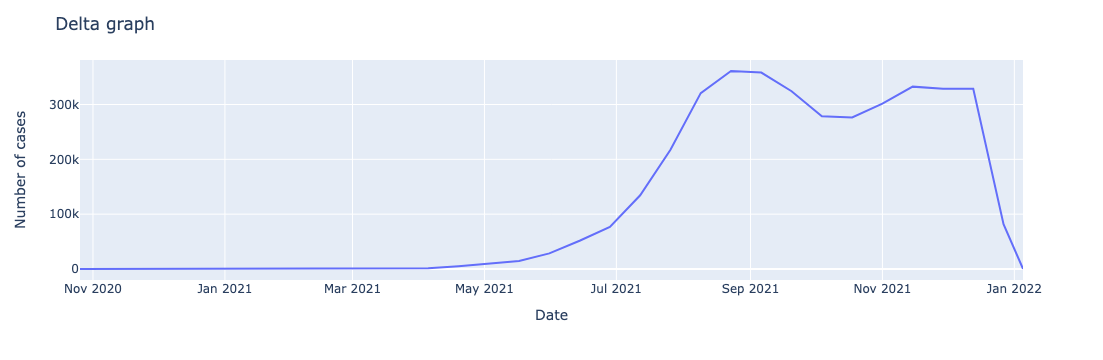

(None, None)

In [40]:
def variant_wise_plot(variant1, variant2): 
    df1 = df_omicron[(df_omicron.variant == variant1) & (df_omicron.num_sequences != 0)]
    df1 = df1.groupby(['date'])['num_sequences'].sum().reset_index()
    
    df2 = df_omicron[(df_omicron.variant == variant2) & (df_omicron.num_sequences != 0)]
    df2 = df2.groupby(['date'])['num_sequences'].sum().reset_index()
    
    fig1 = px.line(df1, x='date', y='num_sequences')
    fig1.update_layout(
        title={
                'text' : variant1+' graph',
            },
        xaxis_title="Date",
        yaxis_title="Number of cases"
    )
    fig2 = px.line(df2, x='date', y='num_sequences')
    fig2.update_layout(
        title={
                'text' : variant2+' graph',
            },
        xaxis_title="Date",
        yaxis_title="Number of cases"
    )
    
    return fig1.show(), fig2.show()

variant_wise_plot('Omicron', 'Delta')

<h4>Date wise graph of different variants</h4>

/usr/local/Cellar/jupyterlab/4.0.12/libexec/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



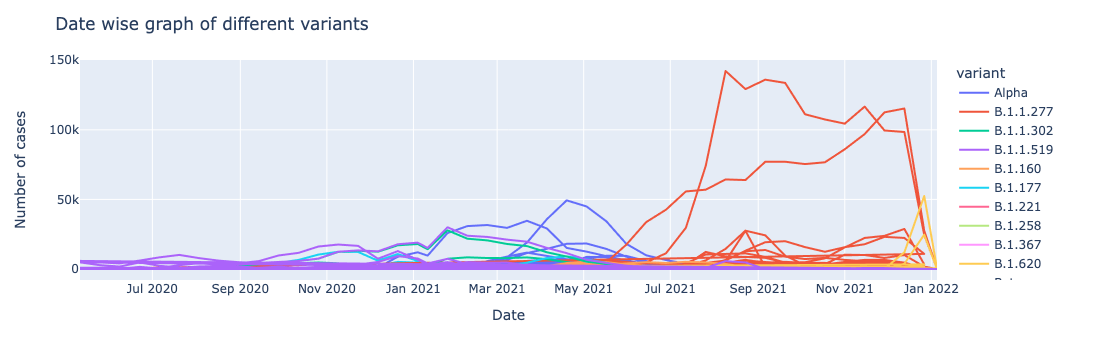

In [41]:
fig = px.line(df_omicron, x = 'date', y ='num_sequences', color = 'variant')
fig.update_layout(
        title={
                'text' : 'Date wise graph of different variants',
            },
        xaxis_title="Date",
        yaxis_title="Number of cases"
    )
fig.show()

<h3>Number of cases around the world</h3>

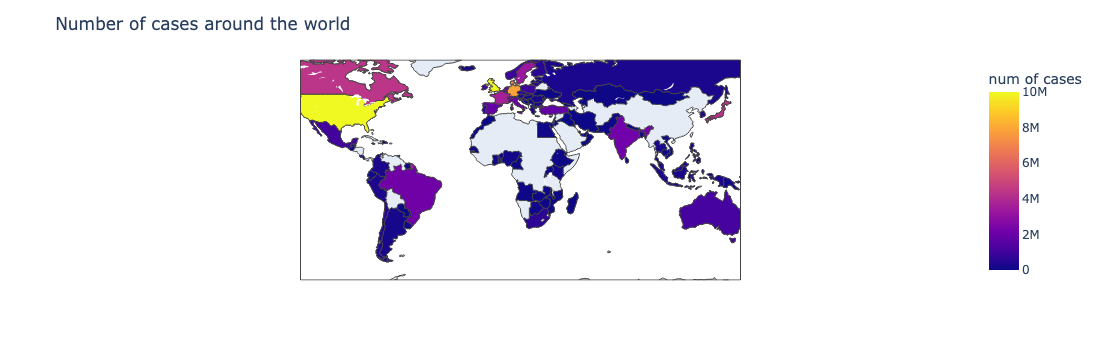

In [42]:
country_df = df_omicron.groupby(['location'])['num_sequences_total'].sum().sort_values(ascending = False).reset_index()
country_df.rename(columns = {'num_sequences_total' : 'num of cases'}, inplace = True)
fig = px.choropleth(country_df,locations='location', locationmode= 'country names', color= 'num of cases', 
                       range_color=[1,10000000], hover_name='location')

fig.update_layout(
        title={
                'text' : 'Number of cases around the world',
            }
    )

fig.show()

<h3>different variants</h3>

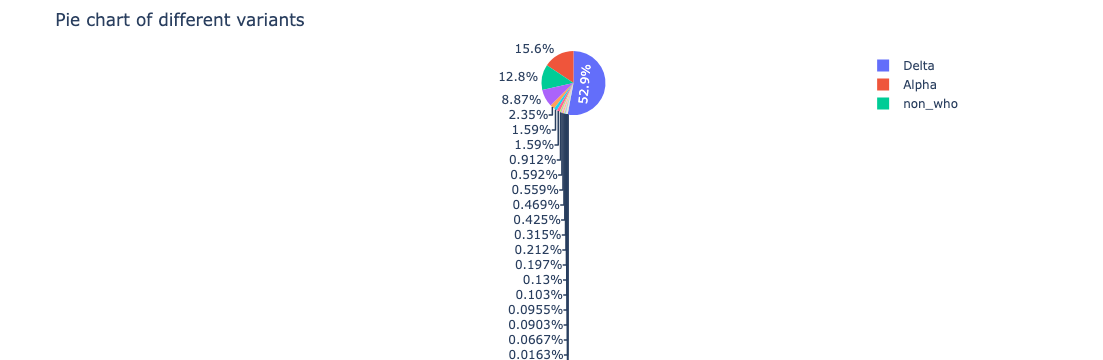

In [44]:
variant_dict = {}
for val in df_omicron.variant.unique() : 
    if val not in variant_dict.keys() : 
        dummy_df = df_omicron[df_omicron.variant == val]
        variant_dict[val] = dummy_df.num_sequences.sum()

variant_df = pd.DataFrame.from_dict(variant_dict, orient='index', columns=['total_cases'])
variant_df.reset_index(inplace = True)
variant_df.head()
fig = px.pie(variant_df, values = 'total_cases', names = 'index')
fig.update_layout(
        title={
                'text' : 'Pie chart of different variants',
            },
    )
fig.show()

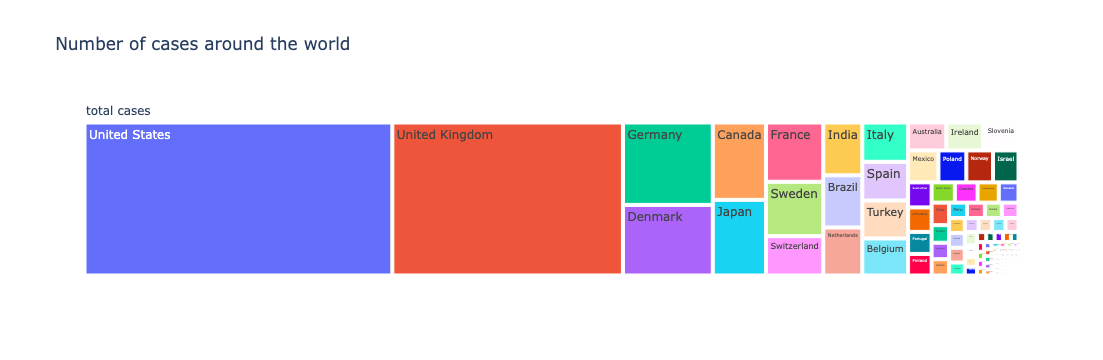

In [46]:
dummy_df = df_omicron.rename(columns = {'num_sequences_total' : 'total cases'})
fig = px.treemap(
    dummy_df, path = [px.Constant('total cases'), 'location'], 
    values = 'total cases', 
    title = 'Number of cases around the world'
)
fig.show()

<h1>Clustering</h1>

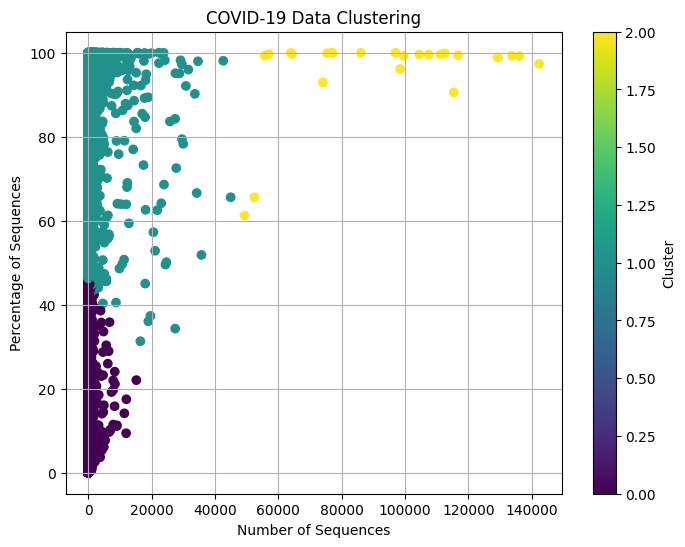

In [7]:
# Select features for clustering
features = df_omicron[['num_sequences', 'perc_sequences']]

# Normalize data
features_normalized = (features - features.mean()) / features.std()

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(features_normalized)
df_omicron['cluster'] = kmeans.labels_

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_omicron['num_sequences'], df_omicron['perc_sequences'], c=df_omicron['cluster'], cmap='viridis')
plt.xlabel('Number of Sequences')
plt.ylabel('Percentage of Sequences')
plt.title('COVID-19 Data Clustering')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

<h1>Classification</h1>

In [11]:
# Features (X) and target variable (y)
X = df_omicron[['num_sequences', 'perc_sequences']]
y = df_omicron['variant']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

Classification Report:
                precision    recall  f1-score   support

         Alpha       0.17      0.07      0.10       835
     B.1.1.277       0.00      0.00      0.00       859
     B.1.1.302       0.00      0.00      0.00       805
     B.1.1.519       0.06      0.00      0.00       837
       B.1.160       0.04      0.00      0.01       878
       B.1.177       0.08      0.02      0.03       832
       B.1.221       0.09      0.01      0.01       814
       B.1.258       0.05      0.01      0.01       807
       B.1.367       0.04      0.98      0.08       763
       B.1.620       0.00      0.00      0.00       889
          Beta       0.08      0.01      0.02       858
         Delta       0.35      0.13      0.19       806
       Epsilon       0.03      0.00      0.00       860
           Eta       0.02      0.00      0.00       849
         Gamma       0.04      0.01      0.01       867
          Iota       0.03      0.00      0.00       845
         Kappa       0.0

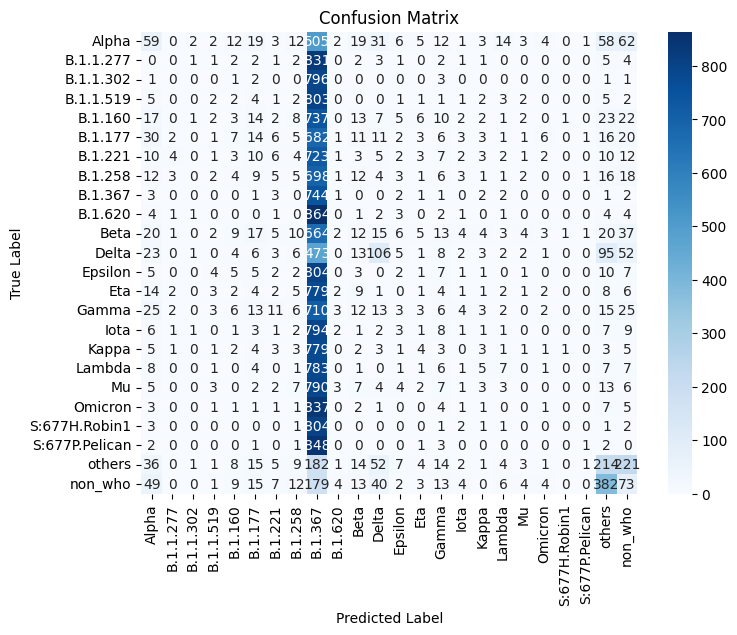

In [ ]:
# Define class labels and confusion matrix
class_labels = df_omicron['variant'].unique()
conf_matrix = cm

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Define meshgrid range
x_min, x_max = X['num_sequences'].min() - 1, X['num_sequences'].max() + 1
y_min, y_max = X['perc_sequences'].min() - 1, X['perc_sequences'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the labels for all points in the meshgrid
Z = rf_classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Plot the training points
sns.scatterplot(x=X_train['num_sequences'], y=X_train['perc_sequences'], hue=y_train, palette='Set1', edgecolor='k', s=100, alpha=0.7)
plt.title("Decision Boundaries of Random Forest Classifier")
plt.xlabel("Number of Sequences")
plt.ylabel("Percentage of Sequences")
plt.legend(title="Variant")
plt.show()